In [1]:
%matplotlib inline
import pynbody
from pynbody.analysis import profile
import matplotlib.pylab as plt
import numpy as np
import astropy.units as u
import os

pynbody : Verbose mode is on


In [2]:
from halo_functions import halo_Wechsler2002, halo_scaled_radius, halo_scaled_density, RHO_C
from cog import compute_cog
from snap_io import load_moria_sim_and_kicked, load_sim

In [3]:
import astropy.units as u
M_h = 1e14 * u.solMass
c = halo_Wechsler2002(M_h)
c

<Quantity 8.147605556082254>

In [4]:
v_r = (M_h/(4.0/3.0*np.pi*200*RHO_C))**(1.0/3.0)
v_r

<Quantity 978.6413640634958 kpc>

In [5]:
virial_radius = c * halo_scaled_radius(M_h, c)
virial_radius

<Quantity 978.6413640634958 kpc>

In [6]:
SIM_NUMBER = 71002

In [7]:
moria_sim, kicked_sim = load_moria_sim_and_kicked(SIM_NUMBER)

pynbody.snapshot : Loading using backend <class 'pynbody.snapshot.gadget.GadgetSnap'>
pynbody.snapshot : Loading using backend <class 'pynbody.snapshot.gadget.GadgetSnap'>
pynbody.snapshot : Loading using backend <class 'pynbody.snapshot.gadget.GadgetSnap'>
pynbody.snapshot : Loading using backend <class 'pynbody.snapshot.gadget.GadgetSnap'>
pynbody.snapshot : Loading using backend <class 'pynbody.snapshot.gadget.GadgetSnap'>
pynbody.snapshot : Loading using backend <class 'pynbody.snapshot.gadget.GadgetSnap'>
pynbody.snapshot : Loading using backend <class 'pynbody.snapshot.gadget.GadgetSnap'>
pynbody.snapshot : Loading using backend <class 'pynbody.snapshot.gadget.GadgetSnap'>
pynbody.snapshot : Loading using backend <class 'pynbody.snapshot.gadget.GadgetSnap'>
pynbody.snapshot : Loading using backend <class 'pynbody.snapshot.gadget.GadgetSnap'>
pynbody.snapshot : Loading using backend <class 'pynbody.snapshot.gadget.GadgetSnap'>
pynbody.snapshot : Loading using backend <class 'pynbo

In [8]:
# sim_path = '/home/michele/sim/MySimulations/Moria8Gyr_tidal/sim60002/out/'
# snaplist = snapshot_list(sim_path, include_dir=True)
# sim = pynbody.load(snaplist[-1])
# sim.physical_units()
# print(sim.filename)
# print(sim.properties['time'].in_units('Gyr'))
# sim.properties
# Jtot = np.sqrt(((np.multiply(sim['j'].transpose(), sim['mass']).sum(axis=1))**2).sum()) # calculate angular momentum

In [9]:
# p_all = profile.Profile(s62, max='250 kpc')
# plt.plot(p_all['rbins'].in_units('kpc'),p_all['vr_disp'].in_units('km s^-1'),'k')
# plt.xlabel('$R$ [kpc]'); plt.ylabel('$\sigma_{r}$')

In [10]:
recompute = False
# npy_file = 'cog.npy'
if not recompute:
    data = np.load('cog{}.npz'.format(SIM_NUMBER))
    times_moria, cog_moria = data['times'], data['cog']
    data = np.load('cog{}_kicked.npz'.format(SIM_NUMBER))
    times_kicked, cog_kicked = data['times'], data['cog']
else:
    times_moria, cog_moria = compute_cog(moria_sim, cache_file='cog{}.npz'.format(SIM_NUMBER));
    times_kicked, cog_kicked = compute_cog(kicked_sim, cache_file='cog{}_kicked.npz'.format(SIM_NUMBER));

In [11]:
bins_sfr = 100
trange = (min(np.min(times_moria), np.min(times_kicked)), max(np.max(times_moria), np.max(times_kicked)))
trange = (0, min(np.max(times_moria), np.max(times_kicked)))
bins = np.linspace(*trange, bins_sfr)
trange, times_moria[-1], times_kicked[-1]

((0, 13.11397991328508), 13.132385105582971, 13.11397991328508)

Use `trange` and `range` keywords to equalize the range of the simulation between the two 

/home/michele/Software/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadrature.py:709: AccuracyWarning: divmax (10) exceeded. Latest difference = 5.972695e-08
  AccuracyWarning)
/home/michele/Software/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadrature.py:709: AccuracyWarning: divmax (10) exceeded. Latest difference = 1.037007e-09
  AccuracyWarning)
/home/michele/Software/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadrature.py:709: AccuracyWarning: divmax (10) exceeded. Latest difference = 1.825575e-09
  AccuracyWarning)
/home/michele/Software/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadrature.py:709: AccuracyWarning: divmax (10) exceeded. Latest difference = 3.776510e-09
  AccuracyWarning)
/home/michele/Software/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadrature.py:709: AccuracyWarning: divmax (10) exceeded. Latest difference = 1.048614e-08
  AccuracyWarning)


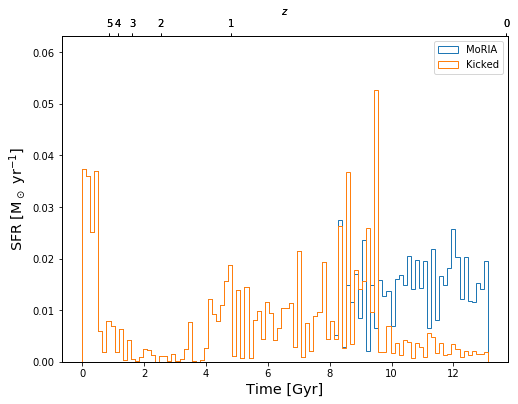

In [12]:
fig, ax = plt.subplots(figsize=(8,6))
sfr_moria, sfr_moria_bins = pynbody.plot.sfh(moria_sim[-1], bins=bins_sfr, trange=trange, range=trange, label='MoRIA', subplot=ax)
sfr_kicked, sfr_kicked_bins = pynbody.plot.sfh(kicked_sim[-1], bins=bins_sfr, trange=trange, range=trange, label='Kicked', subplot=ax)
plt.xlabel('Time [Gyr]', fontsize='x-large')
plt.ylabel('SFR [M$_\odot$ yr$^{-1}$]', fontsize='x-large');
plt.legend();

In [13]:
np.testing.assert_array_equal(sfr_moria_bins, sfr_kicked_bins)

In [14]:
# if recompute:
#     del moria_sim, kicked_sim
# import gc
# gc.collect()

In [15]:
cog_moria.shape, times_moria.shape

((3, 165), (165,))

In [16]:
def rebin_cog(sfr_times, sim_times, cog):
    rebin_x_cog = np.interp(sfr_times, sim_times, cog[0,:])
    rebin_y_cog = np.interp(sfr_times, sim_times, cog[1,:])
    return rebin_x_cog, rebin_y_cog

In [17]:
t_sfr_moria = sfr_moria_bins[:-1]
t_sfr_kicked = sfr_kicked_bins[:-1]

x_cog_moria, y_cog_moria = rebin_cog(t_sfr_moria, times_moria, cog_moria)
x_cog_kicked, y_cog_kicked = rebin_cog(t_sfr_kicked, times_kicked, cog_kicked)

In [18]:
np.testing.assert_array_equal(t_sfr_moria, t_sfr_kicked)

In [19]:
x_cog, y_cog = cog_moria[0,:], cog_moria[1,:]

## Checking the COG orbit

(192.70822847125675, 855.40691006350107)

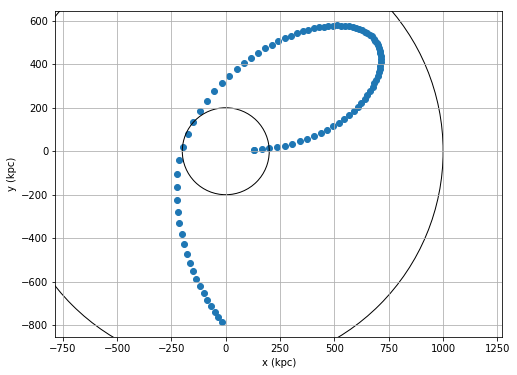

In [20]:
fig, ax = plt.subplots(figsize=(8,6))
ax.set_xlabel("x (kpc)")
ax.set_ylabel("y (kpc)")
ax.scatter(*cog_kicked[:2], marker='o')
ax.plot((0,0), '')
c1, c2 = plt.Circle((0,0), radius=1000, fill=False), plt.Circle((0,0), radius=200, fill=False)
ax.add_artist(c1)
ax.add_artist(c2)
ax.axis('equal')
ax.grid()
r = np.sqrt(cog_kicked[0,:]**2+cog_kicked[1,:]**2+cog_kicked[2,:]**2)
r[:-10].min(), r.max()

In [21]:
orig = plt.cross

## Comparing COG position and SFH

In [22]:
import bokeh
from bokeh.layouts import gridplot, row, column
from bokeh.io import output_notebook
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource
import pandas as pd
bokeh.io.output_notebook()

Loading BokehJS ...

In [23]:
df = pd.DataFrame(dict(t_m=t_sfr_moria,
                        sfr_m=sfr_moria,
                        x_cog_m=x_cog_moria,
                        y_cog_m=y_cog_moria,
                        t_k=t_sfr_kicked,
                        sfr_k=sfr_kicked,
                        x_cog_k=x_cog_kicked,
                        y_cog_k=y_cog_kicked));
df.r = np.sqrt(df.x_cog_k**2 + df.y_cog_k**2)
# df.sfr_rescaled = df.sfr*4e2

/home/michele/Software/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if __name__ == '__main__':


In [24]:
source_moria = ColumnDataSource(data=dict(t=t_sfr_moria,
                                          sfr=sfr_moria,
                                          x_cog=x_cog_moria,
                                          y_cog=y_cog_moria))
source_moria.column_names

['t', 'sfr', 'x_cog', 'y_cog']

In [25]:
source_kicked = ColumnDataSource(data=dict(t=t_sfr_kicked,
                                           sfr=sfr_kicked,
                                           x_cog=x_cog_kicked,
                                           y_cog=y_cog_kicked))
# t = source_kicked.data['t']

In [26]:
from bokeh.models.annotations import Span
from bokeh.models import HoverTool

In [27]:
def compare_cog_sfh_single(df):
    start = (df.x_cog[0], df.y_cog[0])
    end = (df.x_cog[-1], df.y_cog[-1])

    hover = HoverTool(tooltips=[
            ("(x,y)", "(@x_cog, @y_cog)"),
            ("r", "hypot(@x_cog**2, @y_cog)"),
            ("time", "@t"),
            ("SFR", "@sfr Msol/yr" ),
        ],
                      names=["cog"])
    source.add(source.data['sfr']*4e2, "sfr_rescaled")
    source.add(source.data['x_cog']**2 + source.data['y_cog']**2, "r")
    tools = 'lasso_select, box_select, tap, wheel_zoom, pan, box_zoom, reset'
    
    # COG figure
    f1 = figure(width=400, height=400, title='Center of gravity position',
                x_axis_label="x (kpc)", y_axis_label="y (kpc)",
                tools=tools, match_aspect=True)
    f1.circle('x_cog', 'y_cog', source=source, name='cog')
    f1.circle(*start, color='yellow')
    f1.circle(*end, color='red')
#     f1.circle(0,0, radius=virial_radius.value, alpha=0.1)
    f1.circle(0,0, radius=200, alpha=0.4)
    f1.circle(0,0, radius=1000, alpha=0.3)
    
    f1.x(0,0)
    f1.add_tools(hover) # do not hover on the virial radius!

    # SFH figure
    f2 = figure(width=400, height=400, title='SFH',
                x_axis_label="Time (Gyr)", y_axis_label="SFR (Msol/yr)",
                tools=tools)
    # f2.tools.pop(4)  # remove pan
    
    # f2.line(t[:-1], sfr)
    f2.vbar(x='t', top='sfr', width=.1, source=source)
    
    
#     t = source.data['t']
#     sfr = source.data['sfr']
#     interval = t[1]-t[0]
#     f2.quad(top='sfr', bottom=np.zeros_like(t), left=t,
#             right=t+interval, alpha=0.5)#, color="#B3DE69")
    simulation_start_line = Span(location=times_moria[0], dimension='height', line_color='firebrick', line_width=1)
    f2.add_layout(simulation_start_line)
    p = row([f1, f2])
    # p = gridplot([[f1, f2]])
    show(p)
    return f1, f2

In [28]:
def compare_cog_sfh_single_source(source):
    start = (source.data['x_cog'][0], source.data['y_cog'][0])
    end = (source.data['x_cog'][-1], source.data['y_cog'][-1])

    hover = HoverTool(tooltips=[
            ("(x,y)", "(@x_cog, @y_cog)"),
            ("r", "hypot(@x_cog**2, @y_cog)"),
            ("time", "@t"),
            ("SFR", "@sfr Msol/yr" ),
        ],
                      names=["cog"])
    source.add(source.data['sfr']*4e2, "sfr_rescaled")
    source.add(source.data['x_cog']**2 + source.data['y_cog']**2, "r")
    tools = 'lasso_select, box_select, tap, wheel_zoom, pan, box_zoom, reset'
    
    # COG figure
    f1 = figure(width=400, height=400, title='Center of gravity position',
                x_axis_label="x (kpc)", y_axis_label="y (kpc)",
                tools=tools, match_aspect=True)
    f1.circle('x_cog', 'y_cog', source=source, name='cog')
    f1.circle(*start, color='yellow')
    f1.circle(*end, color='red')
#     f1.circle(0,0, radius=virial_radius.value, alpha=0.1)
    f1.circle(0,0, radius=200, alpha=0.4)
    f1.circle(0,0, radius=1000, alpha=0.3)
    
    f1.x(0,0)
    f1.add_tools(hover) # do not hover on the virial radius!

    # SFH figure
    f2 = figure(width=400, height=400, title='SFH',
                x_axis_label="Time (Gyr)", y_axis_label="SFR (Msol/yr)",
                tools=tools)
    # f2.tools.pop(4)  # remove pan
    
    # f2.line(t[:-1], sfr)
    f2.vbar(x='t', top='sfr', width=.1, source=source)
    
    
#     t = source.data['t']
#     sfr = source.data['sfr']
#     interval = t[1]-t[0]
#     f2.quad(top='sfr', bottom=np.zeros_like(t), left=t,
#             right=t+interval, alpha=0.5)#, color="#B3DE69")
    simulation_start_line = Span(location=times_moria[0], dimension='height', line_color='firebrick', line_width=1)
    f2.add_layout(simulation_start_line)
    p = row([f1, f2])
    # p = gridplot([[f1, f2]])
    show(p)
    return f1, f2

In [29]:
compare_cog_sfh_single(source_moria)
source_moria.column_names

AttributeError: 'ColumnDataSource' object has no attribute 'x_cog'

In [30]:
np.sqrt(500**2+700**2)

860.23252670426268

In [31]:
f1, f2 = compare_cog_sfh_single(source_kicked)

AttributeError: 'ColumnDataSource' object has no attribute 'x_cog'

In [32]:
# TODO
def compare_cog_sfh(df):
    start = (source.data['x_cog'][0], source.data['y_cog'][0])
    end = (source.data['x_cog'][-1], source.data['y_cog'][-1])

    hover = HoverTool(tooltips=[
#             ("(x,y)", "($x_cog, $y_cog)"),
                     ("time", "@t")],
                      names=["cog"])

    tools = 'lasso_select, box_select, tap, wheel_zoom, pan, box_zoom, reset'
    
    # COG figure
    f1 = figure(width=400, height=400, title='Center of gravity position',
                x_axis_label="x (kpc)", y_axis_label="y (kpc)",
                tools=tools)
    f1.circle('x_cog', 'y_cog', source=source, name='cog')
    f1.circle(*start, color='yellow')
    f1.circle(*end, color='red')
    f1.circle(0,0, radius=virial_radius.value, alpha=0.1)
    f1.x(0,0)
    f1.add_tools(hover) # do not hover on the virial radius!

    # SFH figure
    f2 = figure(width=400, height=400, title='SFH',
                x_axis_label="Time (Gyr)", y_axis_label="SFR (Msol/yr)",
                tools=tools)
    # f2.tools.pop(4)  # remove pan
    
    # f2.line(t[:-1], sfr)
    f2.vbar(x='t', top='sfr', width=.1, source=source)
    
    
#     t = source.data['t']
#     sfr = source.data['sfr']
#     interval = t[1]-t[0]
#     f2.quad(top='sfr', bottom=np.zeros_like(t), left=t,
#             right=t+interval, alpha=0.5)#, color="#B3DE69")
    simulation_start_line = Span(location=times_moria[0], dimension='height', line_color='firebrick', line_width=1)
    f2.add_layout(simulation_start_line)
    p = row([f1, f2])
    # p = gridplot([[f1, f2]])
    show(p)
    return f1, f2


In [33]:
compare_cog_sfh(source)

NameError: name 'source' is not defined

In [34]:
# from bokeh.layouts import layout, row, widgetbox
# from bokeh.models import (
#     ColumnDataSource, HoverTool, TextInput, SingleIntervalTicker, Slider, Button, Label,
#     CategoricalColorMapper,
# )

# def animate_update():
#     gyr = slider.value + 1
#     if gyr > years[-1]:
#         gyr = years[0]
#     slider.value = gyr

# def animate():
#     if button.label == '► Play':
#         button.label = '❚❚ Pause'
#         curdoc().add_periodic_callback(animate_update, 200)
#     else:
#         button.label = '► Play'
#         curdoc().remove_periodic_callback(animate_update)

# button = Button(label='► Play', width=60)
# button.on_click(animate)

In [35]:
import numpy as np
from bokeh.layouts import layout, row, widgetbox
from bokeh.models import (
    ColumnDataSource, HoverTool, TextInput, SingleIntervalTicker, Slider, Button, Label,
    CategoricalColorMapper,
)
from bokeh.application.handlers import FunctionHandler
from bokeh.application import Application
from bokeh.plotting import figure, show

def modify_doc(doc):

    # Set up data
    N = 200
    x = np.linspace(0, 4*np.pi, N)
    y = np.sin(x)
    source = ColumnDataSource(data=dict(x=x, y=y))


    # Set up plot
    plot = figure(plot_height=400, plot_width=400, title="my sine wave",
                  tools="crosshair,pan,reset,save,wheel_zoom",
                  x_range=[0, 4*np.pi], y_range=[-2.5, 2.5])

    plot.line('x', 'y', source=source, line_width=3, line_alpha=0.6)

    # Set up widgets
    text = TextInput(title="title", value='my sine wave')
    offset = Slider(title="offset", value=0.0, start=-5.0, end=5.0, step=0.1)
    amplitude = Slider(title="amplitude", value=1.0, start=-5.0, end=5.0, step=0.1)
    phase = Slider(title="phase", value=0.0, start=0.0, end=2*np.pi)
    freq = Slider(title="frequency", value=1.0, start=0.1, end=5.1, step=0.1)

    # Set up callbacks
    def update_title(attrname, old, new):
        plot.title.text = text.value

    text.on_change('value', update_title)

    def update_data(attrname, old, new):

        # Get the current slider values
        a = amplitude.value
        b = offset.value
        w = phase.value
        k = freq.value

        # Generate the new curve
        x = np.linspace(0, 4*np.pi, N)
        y = a*np.sin(k*x + w) + b

        source.data = dict(x=x, y=y)

    for w in [offset, amplitude, phase, freq]:
        w.on_change('value', update_data)

    # Set up layouts and add to document
    inputs = widgetbox(text, offset, amplitude, phase, freq)

    doc.add_root(row(inputs, plot, width=800))
    doc.title = "Sliders"

    # Set up the Application 
handler = FunctionHandler(modify_doc)
app = Application(handler)


In [36]:
doc = app.create_document()
# Show the application
# Make sure the URL matches your Jupyter instance
show(app, notebook_url="localhost:8888")